# Домашнее задание
## Провести полноценный анализ временного ряда с использованием Python по этапам, которые были рассказаны на лекции

Временной ряд будет представлять собой данные о ежедневной котировки акции (берем цену закрытия - CLOSE), торгующейся на Московской бирже в режиме основных торгов, за весь 2021 год.

Данные выгружаются отсюда:
    https://www.finam.ru/profile/moex-akcii/sberbank_sber-smal/export/?market=1

Пример настройки выгрузки:
    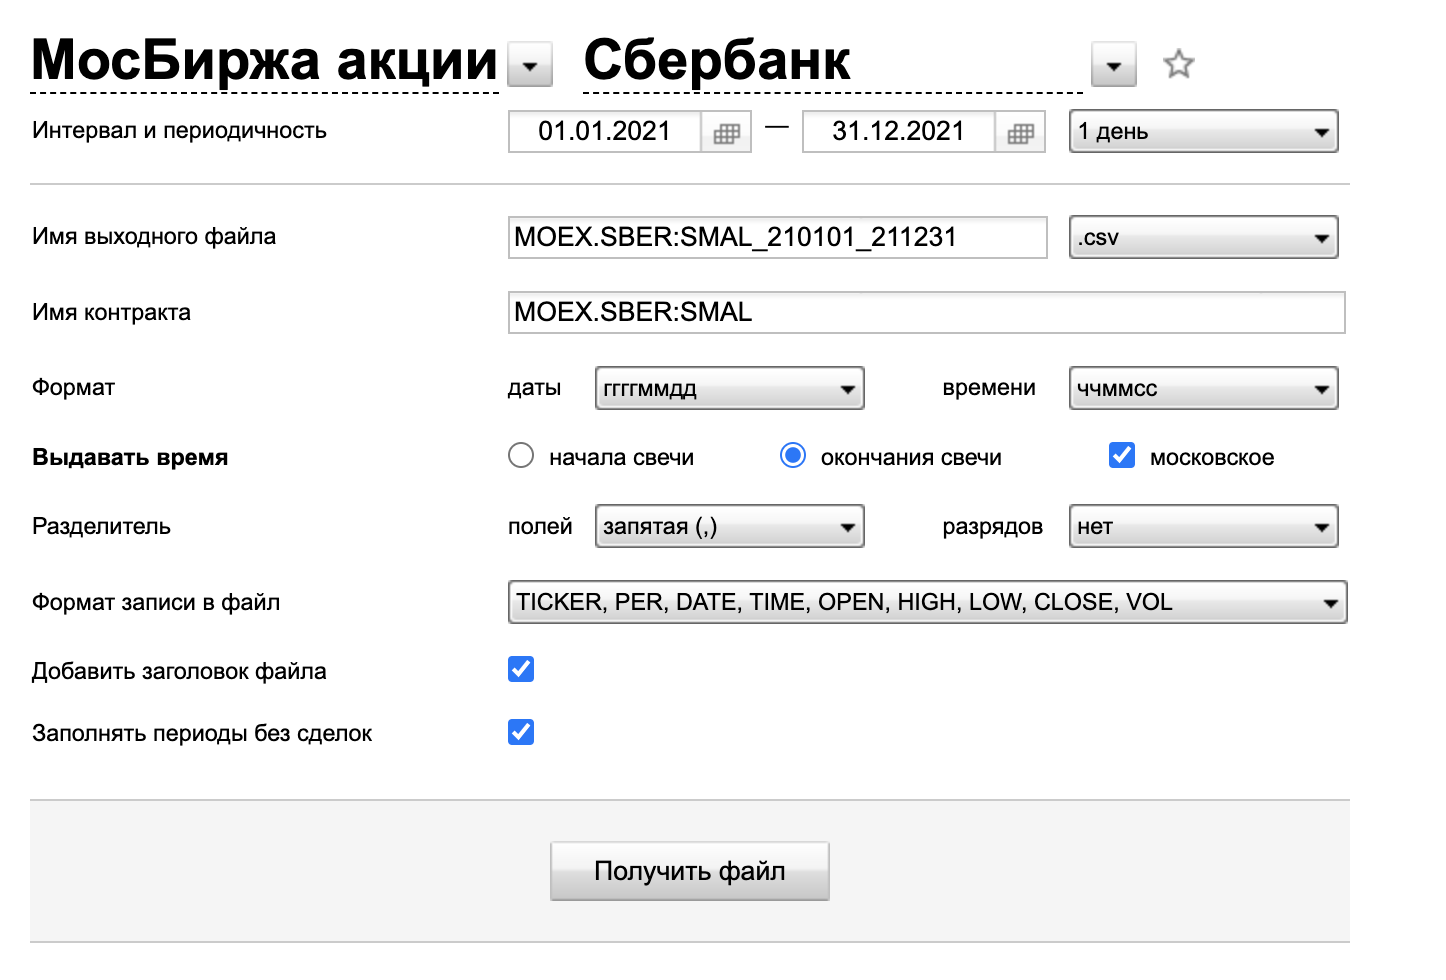

Выбранные акции НЕ должны повторяться между студентами. Свой выбор записываете в данную таблицу:
https://docs.google.com/spreadsheets/d/1LxrP99lMoFRYLgvCBYks-Ojbrc6KsPJr5RF43hS0qLE/edit?usp=sharing

К работе прикладываете файл с загруженными вами данными - без них работа не оценивается.

Каждый этап работы с временными рядами должен сопровождаться качественной интерпретацией результата.

Также вам необходимо осуществить предсказание временного ряда.

Изучите одну из базовых библиотек для прогнозирования - Prophet
https://facebook.github.io/prophet/docs/quick_start.html#python-api

Обучите модель на данных январь - ноябрь и сделайте предсказание на декабре. Оцените качество полученного результата.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as kpss

C:\Users\Elf\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Elf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\Elf\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [81]:
columns = ['date', 'open', 'high', 'low', 'close', 'vol']

data = pd.read_csv('MOEX.VKCO_TQBR_210101_211231.csv')
data = data.drop(labels=['<TICKER>', '<PER>', '<TIME>'], axis = 1)

data = data.set_axis(columns, axis=1, inplace=False)
data['date'] = pd.to_datetime(data['date'], format="%Y%m%d")
data = data.set_index('date')

data.head()


,open,high,low,close,vol
date,,,,,
2021-01-04,1990.0,1999.0,1980.0,1984.8,392692
2021-01-05,1989.0,2057.6,1979.0,2041.8,745005
2021-01-06,2039.8,2077.0,1998.2,2005.6,825941
2021-01-08,2013.0,2037.2,2005.0,2016.0,600224
2021-01-11,2016.0,2073.0,2006.2,2059.0,775688


Есть пропущенные дни

In [82]:
all_days = pd.date_range(data.index.min(), data.index.max(), freq='D')
data = data.reindex(all_days)

data

,open,high,low,close,vol
2021-01-04,1990.0,1999.0,1980.0,1984.8,392692.0
2021-01-05,1989.0,2057.6,1979.0,2041.8,745005.0
2021-01-06,2039.8,2077.0,1998.2,2005.6,825941.0
2021-01-07,NaN,NaN,NaN,NaN,NaN
2021-01-08,2013.0,2037.2,2005.0,2016.0,600224.0
...,...,...,...,...,...
2021-12-26,NaN,NaN,NaN,NaN,NaN
2021-12-27,877.2,899.0,877.0,884.8,1136067.0
2021-12-28,887.8,894.2,870.0,876.6,1012474.0
2021-12-29,876.2,883.0,860.0,865.4,674672.0


<AxesSubplot: xlabel='date'>

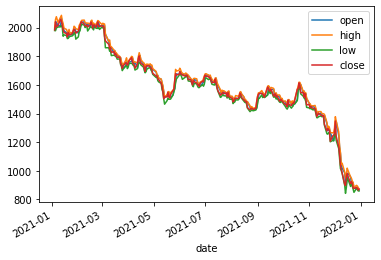

In [36]:
data.drop('vol', axis=1).plot()

<AxesSubplot: xlabel='date'>

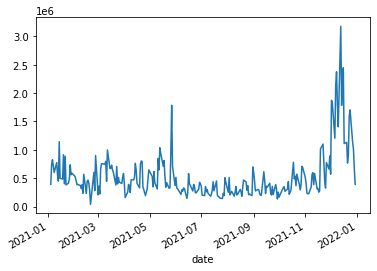

In [37]:
data['vol'].plot()

Прогнозировать будем high

<AxesSubplot: >

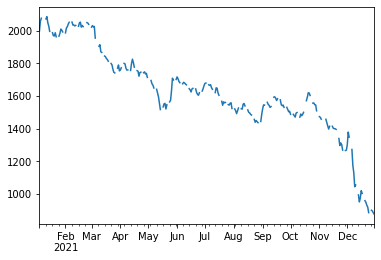

In [54]:
data['high'].plot()

In [74]:
data['month'] = data.index.month
data

,open,high,low,close,vol,month
2021-01-04,1990.0,1999.0,1980.0,1984.8,392692.0,1
2021-01-05,1989.0,2057.6,1979.0,2041.8,745005.0,1
2021-01-06,2039.8,2077.0,1998.2,2005.6,825941.0,1
2021-01-07,NaN,NaN,NaN,NaN,NaN,1
2021-01-08,2013.0,2037.2,2005.0,2016.0,600224.0,1
...,...,...,...,...,...,...
2021-12-26,NaN,NaN,NaN,NaN,NaN,12
2021-12-27,877.2,899.0,877.0,884.8,1136067.0,12
2021-12-28,887.8,894.2,870.0,876.6,1012474.0,12
2021-12-29,876.2,883.0,860.0,865.4,674672.0,12


In [89]:
temp = data.groupby(pd.PeriodIndex(data.index, freq="M")).mean()

temp

,open,high,low,close,vol
2021-01,1988.042105,2012.631579,1962.273684,1987.189474,6.233022e+05
2021-02,2015.360000,2033.890000,1996.240000,2016.040000,4.068985e+05
2021-03,1847.918182,1860.181818,1817.318182,1833.490909,5.658084e+05
2021-04,1746.672727,1762.636364,1722.018182,1741.609091,4.537111e+05
2021-05,1592.820000,1609.690000,1566.830000,1589.510000,6.491182e+05
2021-06,1641.600000,1654.809091,1622.236364,1638.472727,3.296096e+05
2021-07,1594.227273,1605.100000,1571.981818,1585.645455,2.710119e+05
2021-08,1483.472727,1494.218182,1467.363636,1480.590909,3.023493e+05
2021-09,1533.918182,1547.627273,1514.100000,1531.690909,3.214104e+05
2021-10,1509.095238,1526.571429,1484.866667,1507.276190,3.995790e+05


In [91]:
for i in range(1, 13):
    data.loc[(data['high'].isna()) & (data.index.month == i), 'high'] = temp.iloc[i - 1]['high']

<AxesSubplot: >

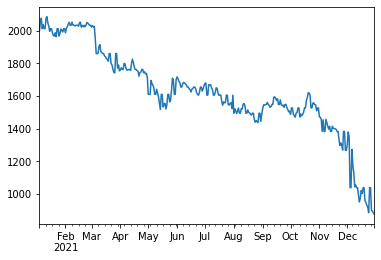

In [93]:
data['high'].plot()

In [96]:
data_train = data['high'].loc[:'2021-10-30']
data_test = data['high'].loc['2021-11-01':]

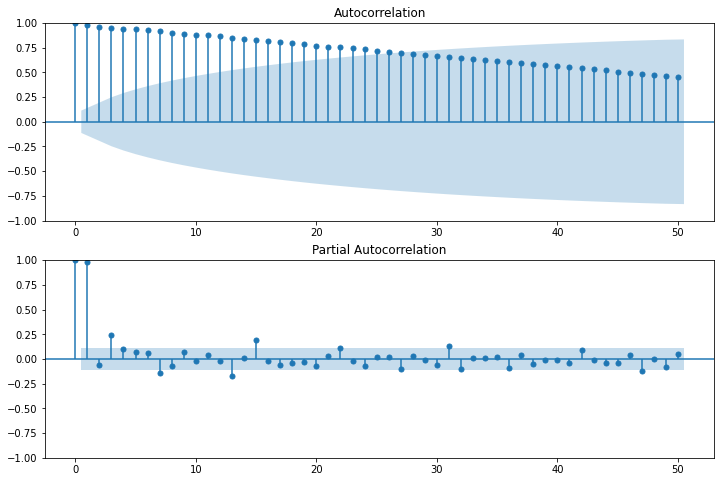

In [97]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_train.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_train, lags=50, ax=ax2)

Сезонность убили сразу, d=1

<AxesSubplot: >

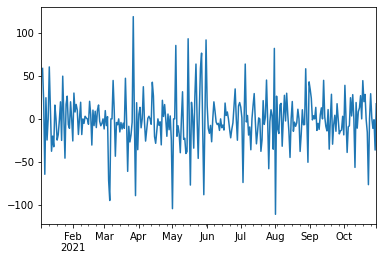

In [98]:
data_train.diff(1).plot()

In [109]:
# По Тинькоофф статистике: вроде как смотря по значениям автокорреляции можно понять какие параметры брать
p = 27
q = 2

P = 2
Q = 0

d = 1
D = 1

<AxesSubplot: >

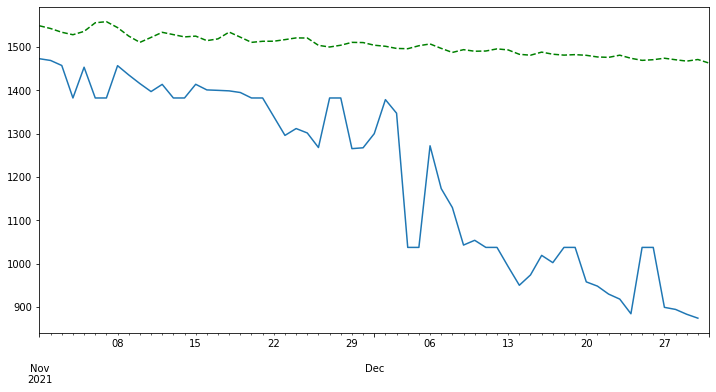

In [117]:
model = sm.tsa.SARIMAX(data_train, order=(19, 1, 3), seasonal_order=(0, 1, 0, 7)).fit(full_output=False, disp=0)

pred_sarima = model.predict('2021-11-01','2021-12-31')

data_test.plot(figsize=(12,6))
pred_sarima.plot(style='g--')

C:\Users\Elf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Elf\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Elf\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot: >

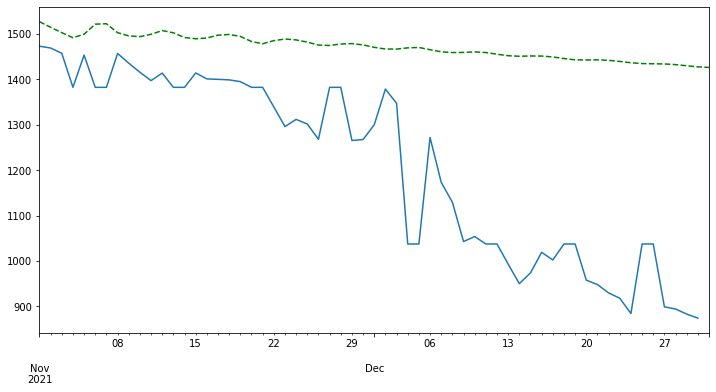

In [128]:
model = sm.tsa.ARIMA(data_train, order=(19, 2, 3)).fit()

pred_sarima = model.predict('2021-11-01','2021-12-31')

data_test.plot(figsize=(12,6))
pred_sarima.plot(style='g--')

На практике сделать нормальное предсказание вышло трудно.
Скорее всего надо еще подшаманить над параметрами модели. В принципе, у ряда нет сезонности, значит SARIMA не нужна, но как подогнать под это ARIMу - не совсем ясно